# <span style="color:green"> Laboratorio di simulazione numerica (LSN) </span>
## <span style="color:blue">  Esercitazione numerica 2 </span>

## Moduli
Si importano moduli e librerie utili per il notebook. Inoltre si inizializzano i parametri di matplotlib.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit  

%matplotlib inline
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams["legend.loc"] = 'center right'

## Esercizio 02.1: <span style="color:brown"> Integrale Monte Carlo 1D </span>
Si riportano i risultati delle simulazioni Monte Carlo per il calcolo dell'integrale della funzione $f(x) = \frac{\pi}{2}\cos(\pi x/2)$ sia utilizzando un *campionamento uniforme* che utilizzando il *campionamento rilevante*.\
Per eseguire il calcolo sono stati usati $M=10^7$ steps Monte Carlo e $N=100$ blocchi per il blocking method.

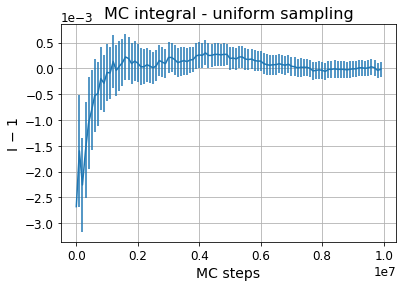

In [2]:
x, sum_prog, err_prog = np.loadtxt('integral.dat', dtype=float, unpack='true')
L = 100000
x *= L # Number of throws

#make plot
plt.errorbar(x, sum_prog-1, yerr=err_prog)
plt.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
plt.title(f"MC integral - uniform sampling", size=16)
plt.xlabel(f'MC steps')
plt.ylabel(f'I$\,-\,1$')
plt.grid(True)
plt.show()

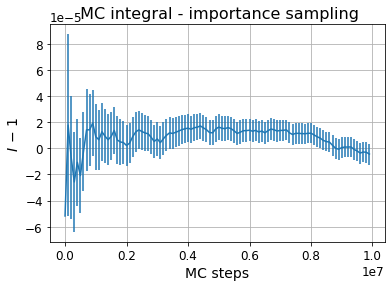

In [3]:
x_IS, sum_prog_IS, err_prog_IS = np.loadtxt('integral_IS.dat', dtype=float, unpack='true')
x_IS *= L # Number of throws

#make plot
plt.errorbar(x_IS, sum_prog_IS-1, yerr=err_prog_IS)
plt.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
plt.title(f" MC integral - importance sampling", size=16)
plt.xlabel(f'MC steps')
plt.ylabel(f'$I\,-\,1$')
plt.grid(True)
plt.show()

## Esercizio 02.2: <span style="color:brown"> Random Walk 3D </span>
Si riportano i risultati delle simulazioni per la lunghezza del random walk, sia per il caso discreto (reticolo cubico) sia per il caso continuo.\
Per il caso discreto si è utilizzato un reticolo con passo $a=1$ e anche nel caso continuo si è scelto uno step di lunghezza unitaria.\
Per le simulazioni sono stati usati un totale di $M=10^6$ steps Monte Carlo, suddivisi in $N=100$ blocchi (per il data blocking) per ciascun passo $i \in [0,100]$ del random walk.

### Random Walk su un reticolo cubico

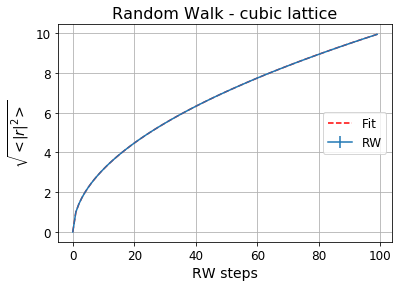

In [4]:
def test_diffusive(N, k): 
    return k*(N**0.5) 

mean_r2, err_r2 = np.loadtxt('random_walk.dat', dtype=float, unpack='true')
steps = np.array([i for i in range(len(mean_r2))])

#returns fit parameters and covariance
param, param_cov = curve_fit(test_diffusive, steps, mean_r2)
y_fit = param[0]*(steps**0.5)
#print(param, np.sqrt(parm_cov))  #print param value and error

#make plot
plt.errorbar(steps, mean_r2, yerr=err_r2, label='RW')
plt.plot(steps, y_fit, '--', color ='red', label ="Fit")
plt.title(f"Random Walk - cubic lattice", size=16)
plt.xlabel(f'RW steps')
plt.ylabel('$\sqrt{<\!|r|^2\!>}$')
plt.legend()
plt.grid(True)
plt.show()

### Random Walk nel continuo

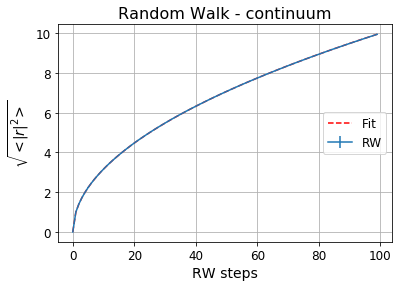

In [5]:
mean_r2C, err_r2C = np.loadtxt('random_walk_continuum.dat', dtype=float, unpack='true')
steps = np.array([i for i in range(len(mean_r2C))])

#returns fit parameters and covariance
paramC, param_covC = curve_fit(test_diffusive, steps, mean_r2C)
y_fit = paramC[0]*(steps**0.5)
#print(paramC, np.sqrt(param_covC))  #print param value and error

#faccio il grafico
plt.errorbar(steps, mean_r2C, yerr=err_r2C, label='RW')
plt.plot(steps, y_fit, '--', color ='red', label ="Fit")
plt.title(f"Random Walk - continuum", size=16)
plt.xlabel(f'RW steps')
plt.ylabel('$\sqrt{<\!|r|^2\!>}$')
plt.legend()
plt.grid(True)
plt.show()

Si vede come tutti i risultati ottenuti siano pienamente compatibili con i valori attesi, sia nel caso discreto che nel caso continuo.\
**Osservazione**: I risultati del fit evidenziano il tipico comportamento diffusivo, dato che l'andamento è del tipo $\sqrt{N}$.